In [1]:
#! /usr/bin/env python

import random
import numpy as np
import matplotlib.pyplot as plt
import time
from decimal import Decimal  # to deal with very large floats

from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
def phi(x, y, L):
    """Edge function."""
    assert x == 0 or x == L or y == 0 or y == L
    if x == 0 or x == L:
        return 1
    return 0

In [3]:
def is_on_edge(x, y, L):
    """Return whether the point (x, y) is on an edge."""
    return (x == 0 or x == L or y == 0 or y == L)

In [4]:
def value_on_points_reached(x, y, L):
    """Simulate the random walk, starting from point (x, y), until all branches have died or reached an edge.
    If no branch reached an edge (all branches died before), return 0.
    Otherwise, return the product of the values of all branches having reached an edge.
    """
    if is_on_edge(x, y, L):
        return phi(x, y, L)
    
    # Now we start with a single branch, initially not on an edge.
    unfixedBranches = [[x,y]]  # initially we have one branch
    fixedBranches = []  # the branches having reached an edge get fixed there
    while len(unfixedBranches) > 0:
        branchesToDelete = []  # indices of the branches that will die or reach an edge during this iteration
        branchesToAdd = []  # coordinates of the branches that will be created (by duplication) during this iteration
        for branchId, (x, y) in enumerate(unfixedBranches):
            assert not (x == 0 or x == L or y == 0 or y == L)  # we shouldn't be on an edge
            rand = random.random()
            if 0 <= rand < 1/3:
                # Move the branch left, right, up or down.
                if 0 <= rand < 1/12:
                    x -= 1  # go left
                elif 1/12 <= rand < 2/12:
                    x += 1  # go right
                elif 2/12 <= rand < 3/12:
                    y -= 1  # go down
                else:
                    y += 1  # go up
                if is_on_edge(x, y, L):
                    # We've just reached an edge.
                    branchesToDelete.append(branchId)
                    fixedBranches.append([x, y])
                else:
                    unfixedBranches[branchId] = [x, y]

            elif 1/3 <= rand < 2/3:
                # This branch dies
                branchesToDelete.append(branchId)
            else:
                # Duplicate this branch
                branchesToAdd.append([x,y])
        # Remove the dead branches
        unfixedBranches = [branch for i, branch in enumerate(unfixedBranches) if i not in branchesToDelete]
        # Add the newly created branches
        unfixedBranches += branchesToAdd
    
    # All branched are fixed or dead.
    # Have all branches died before reaching an edge?
    if len(fixedBranches) == 0:
        return 0
    # Some branches have reached an edge. Compute the product of their values.
    product = 1
    for x, y in fixedBranches:
        product *= phi(x, y, L)
    return product

In [5]:
def monte_carlo(x, y, L, K):
    """Simulate K times on point (x, y) and return the average result."""
    sum = 0
    for _ in range(K):
        sum += value_on_points_reached(x, y, L)
    return sum/K

In [6]:
def approximate_solution(L, K):
    start = time.time()
    averages = np.zeros((L, L))
    for x in range(L):
        for y in range(L):
            averages[x][y] = monte_carlo(x, y, L, K)
        nowm = int((time.time() - start) // 60)
        nows = int((time.time() - start) % 60)
        print("x = {:2}/{} done, elapsed time = {:2}m {:2}s".format(x, L-1, nowm, nows))
    return averages

In [7]:
def plot_approximate_solution(L, K):
    plt.imshow(approximate_solution(L, K).T, origin="lower",
               extent=[0, 1, 0, 1], cmap="jet")
    plt.show()

L = 30, K = 100
x =  0/29 done, elapsed time =  0m  0s
x =  1/29 done, elapsed time =  0m  0s
x =  2/29 done, elapsed time =  0m  1s
x =  3/29 done, elapsed time =  0m  2s
x =  4/29 done, elapsed time =  0m  3s
x =  5/29 done, elapsed time =  0m  5s
x =  6/29 done, elapsed time =  0m  7s
x =  7/29 done, elapsed time =  0m  8s
x =  8/29 done, elapsed time =  0m  9s
x =  9/29 done, elapsed time =  0m 10s
x = 10/29 done, elapsed time =  0m 13s
x = 11/29 done, elapsed time =  0m 16s
x = 12/29 done, elapsed time =  0m 20s
x = 13/29 done, elapsed time =  0m 21s
x = 14/29 done, elapsed time =  0m 22s
x = 15/29 done, elapsed time =  0m 23s
x = 16/29 done, elapsed time =  0m 27s
x = 17/29 done, elapsed time =  0m 29s
x = 18/29 done, elapsed time =  0m 31s
x = 19/29 done, elapsed time =  0m 34s
x = 20/29 done, elapsed time =  0m 37s
x = 21/29 done, elapsed time =  0m 38s
x = 22/29 done, elapsed time =  0m 39s
x = 23/29 done, elapsed time =  0m 40s
x = 24/29 done, elapsed time =  0m 44s
x = 25/29

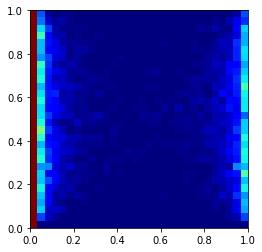

In [8]:
def test():
    """Main function."""
    L = 30  # discretize with squares of length 1/L
    K = 100  # number of simulations per point to compute the average result
    print("L = {}, K = {}".format(L, K))
    plot_approximate_solution(L, K)
    
if __name__ == "__main__":
    test()